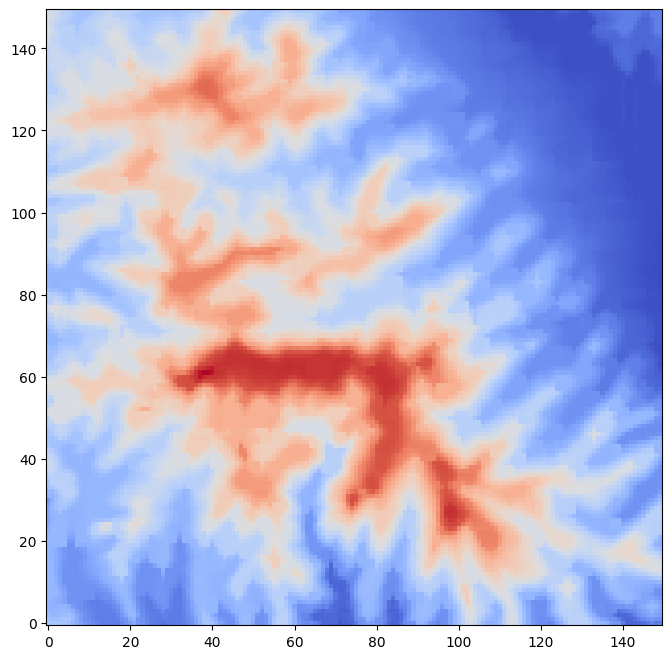

In [2]:
"""
STUDENTENOEFENING: Hilltopping-beweging (ABM vlinders volgens Pe’er et al.)

Doel
----
Je implementeert de kern van het vlinder-ABM:
- Vlinders bewegen op een discreet rooster van patches (cellen).
- Elke patch heeft een vaste hoogte elevation[i, j] (statisch landschap).
- Elke vlinder zit precies op één cel (i, j).
- In elke tijdstap beweegt elke vlinder exact één keer naar een buurcel.

Bewegingsregel (zoals in de tekst)
----------------------------------
Voor elke vlinder:
1) Bepaal de geldige buurcellen in de 8-neighbor Moore-neighborhood.
   - Aan randen/hoeken bestaan minder buren → "reduced neighborhood".
2) Trek u ~ Uniform(0,1).
   - Als u < q: beweeg "heuvelop" naar de buur met de hoogste elevatie.
              Als meerdere buren dezelfde hoogste elevatie hebben → kies willekeurig tussen die buren.
   - Anders: beweeg willekeurig naar één van de geldige buren.

Wat jij moet invullen
---------------------
Vul de TODO-secties in:
- valid_neighbors(...)
- step_butterflies(...)

Onderaan staat een klein voorbeeld (self-test) om je code te controleren.

Conventies (heel belangrijk)
----------------------------
- elevation is een 2D numpy-array met shape (H, W).
- Indices zijn in *array-indexruimte*:
    i = rij-index (row), neemt toe naar beneden
    j = kolom-index (col), neemt toe naar rechts
  (Dus elevation[i, j] = hoogte in rij i, kolom j.)
- Vlinders worden opgeslagen als twee integer arrays:
    bi[k] = rij-index van vlinder k
    bj[k] = kolom-index van vlinder k
"""

import numpy as np
import matplotlib.pyplot as plt

# load the data and show the figure
elevation = np.loadtxt("ElevationData.txt")
plt.figure(figsize=(15,8))
plt.imshow(elevation.T, cmap = 'coolwarm', origin='lower')
plt.show()


# ------------------------------------------------------------
# Buurt-definitie (gegeven)
# ------------------------------------------------------------
# 8-neighbor Moore offsets (di, dj) in indexruimte.
# Elke offset is een mogelijke stap van (i, j) naar (i+di, j+dj).
NEIGH_OFFSETS = np.array([
    (-1, -1), (-1, 0), (-1, 1),
    ( 0, -1),          ( 0, 1),
    ( 1, -1), ( 1, 0), ( 1, 1),
], dtype=np.int32)


def valid_neighbors(i: int, j: int, H: int, W: int):
    """
    Geef een lijst terug van geldige (in-bounds) Moore-buren van cel (i, j).

    Parameters
    ----------
    i, j : int
        Huidige celcoördinaten (rij, kolom).

    H, W : int
        Hoogte en breedte van het rooster (elevation.shape == (H, W)).

    Returns
    -------
    nbrs : list[tuple[int,int]]
        Lijst van (ni, nj)-coördinaten van buurcellen die binnen het rooster liggen.

    Tips / hints
    ------------
    - "Reduced Moore neighborhood" betekent:
      * Binnenin het rooster: 8 buren.
      * Op een rand: 5 buren.
      * In een hoek: 3 buren.
    - Gebruik NEIGH_OFFSETS om kandidaat-buren te maken.
    - Filter alles wat buiten het rooster valt:
          0 <= ni < H  en  0 <= nj < W
    """
    nbrs = []

    # --- TODO ----

    return nbrs


def step_butterflies(
    rng: np.random.Generator,
    elevation: np.ndarray,
    bi: np.ndarray,
    bj: np.ndarray,
    q: float
):
    """
    Voer EXACT één tijdstap uit: elke vlinder beweegt één keer.

    Parameters
    ----------
    rng : np.random.Generator
        Random generator (voor reproduceerbaarheid).

    elevation : np.ndarray, shape (H, W)
        Statisch hoogtelandschap.

    bi, bj : np.ndarray, shape (N,)
        Posities van N vlinders.
        bi[k], bj[k] zijn de integer (rij, kolom)-indices van vlinder k.

    q : float in [0, 1]
        Kans om heuvelop te bewegen (deterministische voorkeur + random tie-break).
        - Met kans q: kies buur met maximale elevatie (ties willekeurig).
        - Met kans 1-q: kies willekeurige geldige buur.

    Returns
    -------
    bi, bj : np.ndarray
        Geüpdatete positie-arrays (worden typisch "in place" aangepast).

    Vereiste implementatie
    ----------------------
    Voor elke vlinder k:
    1) Lees huidige positie (i, j).
    2) Bepaal geldige buren: nbrs = valid_neighbors(i, j, H, W).
    3) Trek u = rng.random().
       Als u < q:
           a) bereken elevaties van alle buren
           b) bepaal de maximum elevatie
           c) verzamel alle buren die die maximum halen (ties)
           d) kies willekeurig één van die beste buren
       Anders:
           kies willekeurig één buur uit nbrs
    4) Schrijf de gekozen buur terug in bi[k], bj[k].

    Veelgemaakte fouten
    -------------------
    - Rand/hoek niet correct behandelen (moet reduced neighborhood zijn).
    - Ties niet willekeurig breken (altijd eerste max kiezen is fout).
    - Indexverwarring: numpy gebruikt elevation[rij, kolom] = elevation[i, j].
    """
    H, W = elevation.shape
    N = bi.shape[0]

    # een random getal trekken tussen 0 en 1: 
    q = rng.random()
    

    # --- TODO ---

    return bi, bj


In [ ]:
import time
from IPython.display import display

rng = np.random.default_rng(0)

H, W = elevation.shape
N = 500                 # aantal vlinders
T = 1000                # aantal tijdstappen
q = 0.75                # kans om heuvelop te bewegen
render_every = 5        # verhoog om Colab te versnellen (probeer 10, 20)

# ---- initialisatie vlinders ----
center_i, center_j = H // 2, W // 2
bi = np.full(N, center_i, dtype=np.int32)
bj = np.full(N, center_j, dtype=np.int32)

# ---- visualisatie setup ----
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xticks([]); ax.set_yticks([])

# achtergrond: hoogtekaart
bg = ax.imshow(elevation.T, cmap='coolwarm', origin='lower', interpolation='nearest')

# vlinders als scatter plot
sc = ax.scatter(bi, bj, s=6, c="black", alpha=0.6)

title = ax.set_title("")
handle = display(fig, display_id=True)
plt.close(fig)  # prevents Colab from emitting a new image each update

t0 = time.time()

for t in range(T):
    bi, bj = step_butterflies(rng, elevation, bi, bj, q=q)
    
    if t % render_every == 0:
        sc.set_offsets(np.c_[bi, bj])

        elapsed = time.time() - t0
        ticks_per_s = (t + 1) / max(elapsed, 1e-9)
        title.set_text(f"Hilltopping butterflies | t={t}/{T} | q={q:.2f} | {ticks_per_s:.1f} ticks/s")

        handle.update(fig)
        time.sleep(0.001)
